# Логистическая регрессия

## Базовое обучение

Для начала загрузим интересующие нас данные (Howell1: Howell !Kung demography data):

In [1]:
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


Соберем выборку более ли менее «стандартных» людей:

In [3]:
df_sample = df[np.logical_and(df['age'] >= 18, df['age'] <= 50)]
df_sample.head()

,height,weight,age,male
3,156.845,53.041914,41.0,1
5,163.830,62.992589,35.0,1
6,149.225,38.243476,32.0,0
7,168.910,55.479971,27.0,1
8,147.955,34.869885,19.0,0


Визуализируем то, что у нас получилось:

In [4]:
import matplotlib.pyplot as plt


In [5]:
def plot(df):
    plt.figure(figsize=(20,10))
    plt.scatter(df.weight[df.male == 1], df.height[df.male == 1], color='blue', label='male')
    plt.scatter(df.weight[df.male == 0], df.height[df.male == 0], color='red', label='female')
    plt.legend(loc=[1.1, 0.5])
    plt.ylabel('рост')
    plt.xlabel('масса')

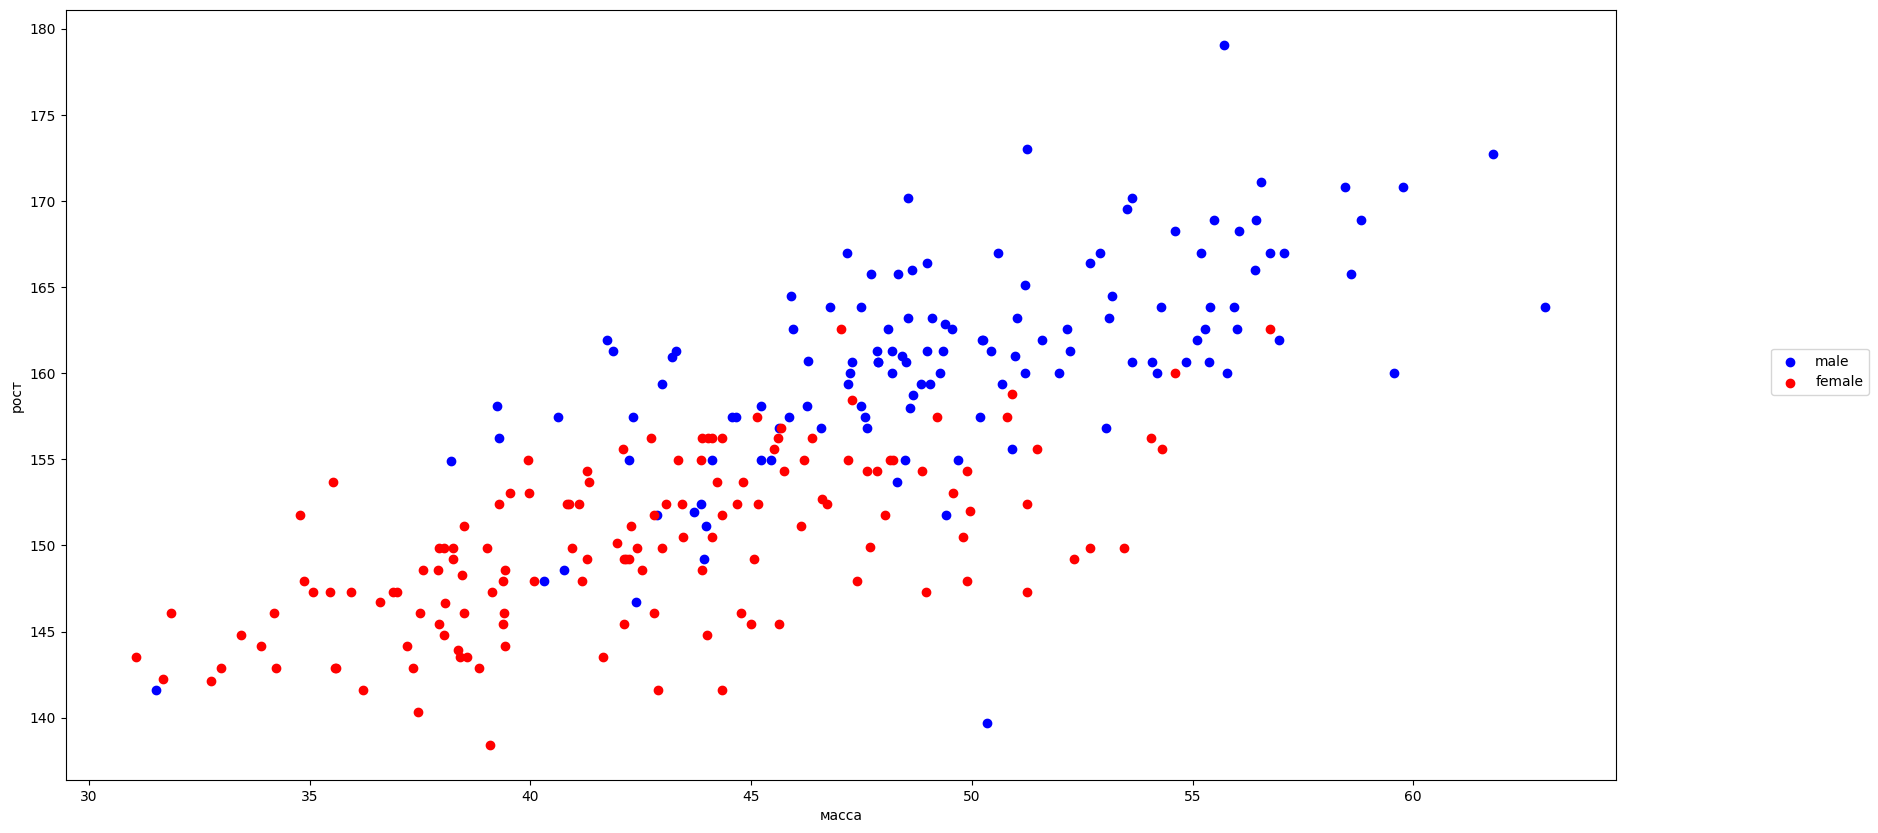

In [13]:
plot(df_sample)   # данный график ввводится т к в юпитере эт возмодно среда интерактиваня

# а так надо ввызвать так  plt.show(), но в питоне и в данной среде возможно без него
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

Разделим выборку на тренировочную и тестовую части, возраст учитывать не будем.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_sample[['height', 'weight']], df_sample['male'], test_size=0.3, random_state=1)

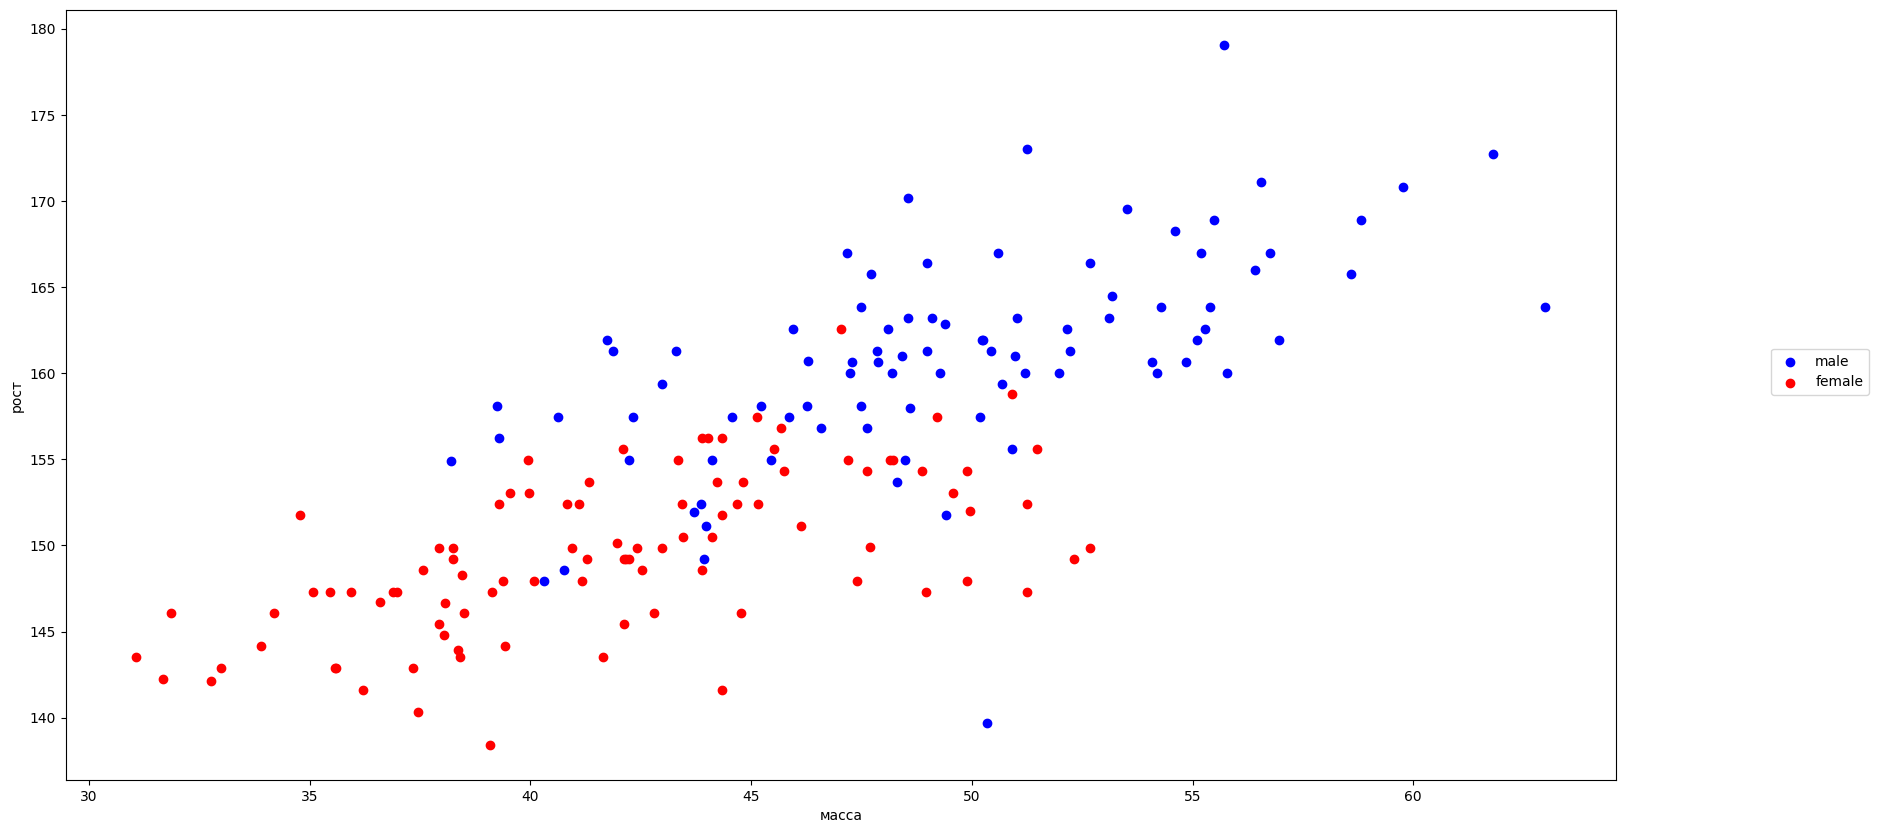

In [17]:
plot(df_sample.loc[X_train.index])

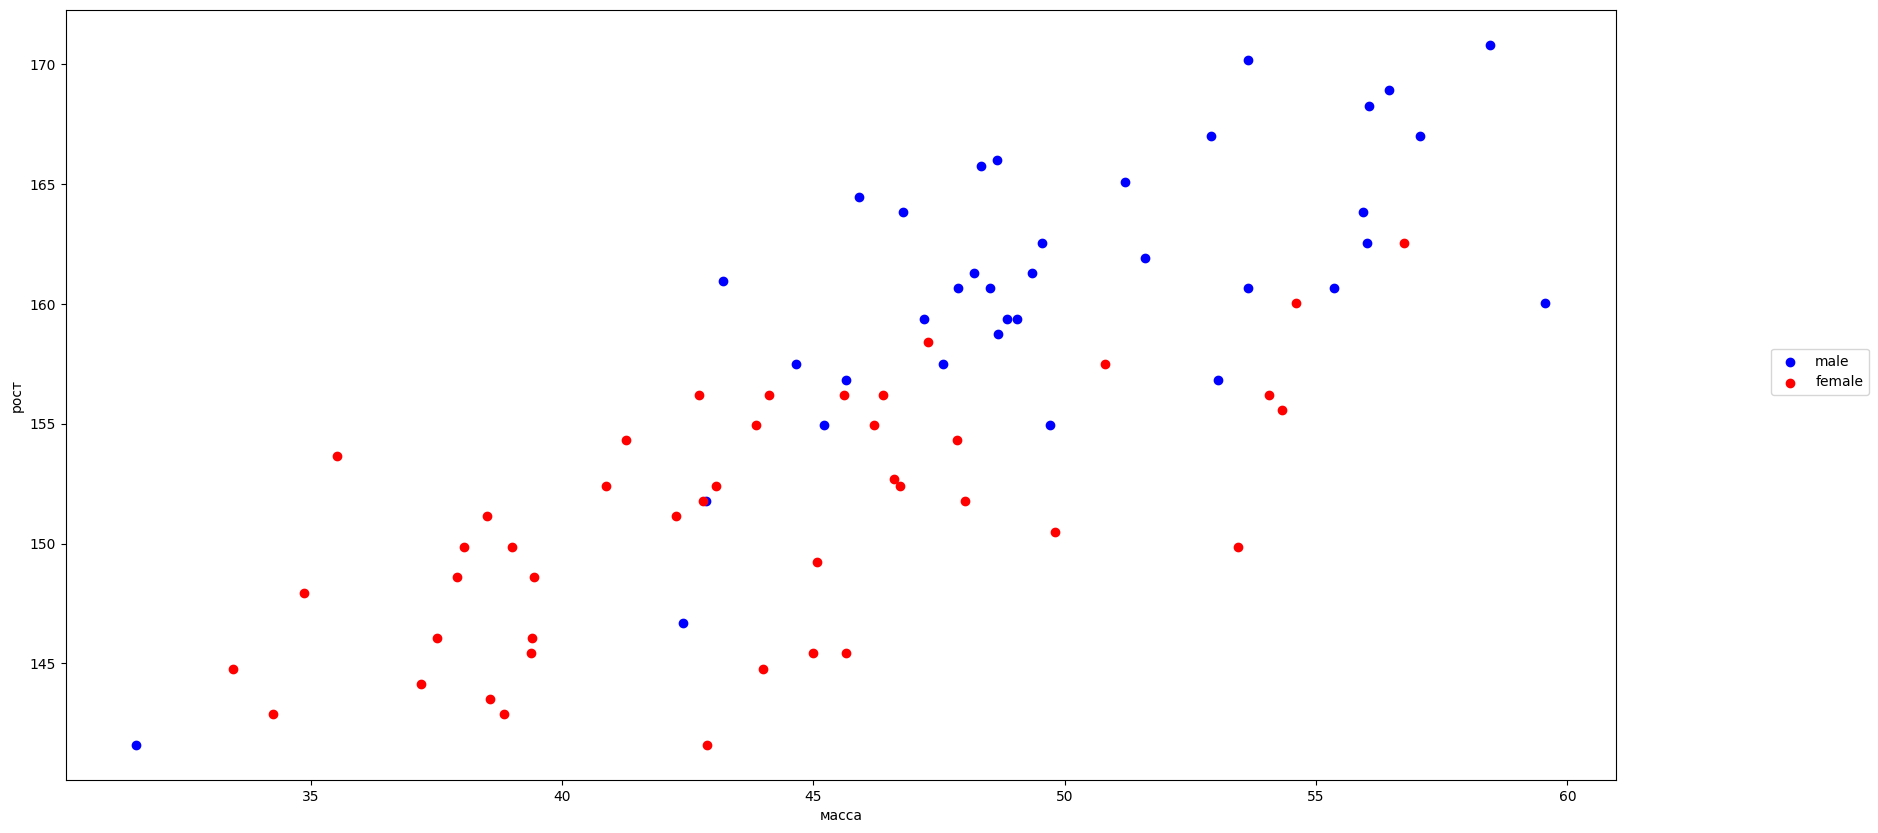

In [18]:
plot(df_sample.loc[X_test.index])

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Обязательно отнормируем значения фичей:

In [22]:
from sklearn.linear_model import LogisticRegression

In [34]:
# Нормировка данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

У логистической регрессии есть разные солверы , как мы делали градиентный супск ,которые можно включить и посмотреть

solver='lbfgs'

In [37]:
# Обучение модели на нормированных данных
lr = LogisticRegression(random_state=2023, solver='lbfgs').fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred = lr.predict(X_test_scaled)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8227848101265823


Обучим модель логистической регрессии.

In [36]:
#lr = LogisticRegression(random_state=2023, solver='lbfgs').fit(X_train, y_train)

Дальше все стандартно: поля `coef_`, `intercept_` и есть обучаемые параметры:
$$
\mathsf P(Class = 1| X) = \frac{1}{1 + \exp(-\theta_0 - \theta_1X_1 - ... - \theta_p X_p)}.
$$
У нас $p = 2$, так что можем все визуализировать.

In [106]:
lr.coef_

array([[2.37062357, 0.4593619 ]])

In [107]:
lr.intercept_

array([-0.10291864])

X_train_scaled — это массив NumPy:


После применения StandardScaler с помощью fit_transform или transform, данные превращаются в массив NumPy. У массива NumPy нет атрибута .index, который есть у DataFrame.

Попытка использовать .index:


В строке plot(df_sample.loc[X_train_scaled.index]) вы пытаетесь получить индекс из X_train_scaled, но это невозможно, так как это массив, а не DataFrame.

Поэтому мы делаем код именно так как ниже, а следующий код выдает линию в другом месте, по причине выше изложенного.

df_sample.loc[X_train.index]:

X_train — это исходный DataFrame (или его часть), который был создан при разделении данных с помощью train_test_split.

У X_train есть атрибут .index, который содержит индексы строк, попавших в обучающую выборку.

df_sample.loc[X_train.index] выбирает из df_sample строки, соответствующие индексам обучающей выборки.

Построение графика разделения:

lims создает массив значений веса (weight) для построения линии разделения.

separation вычисляет соответствующие значения роста (height) для линии разделения, используя коэффициенты обученной модели логистической регрессии (lr.intercept_ и lr.coef_).

plt.scatter(lims, separation, color='brown') рисует линию разделения на графике.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


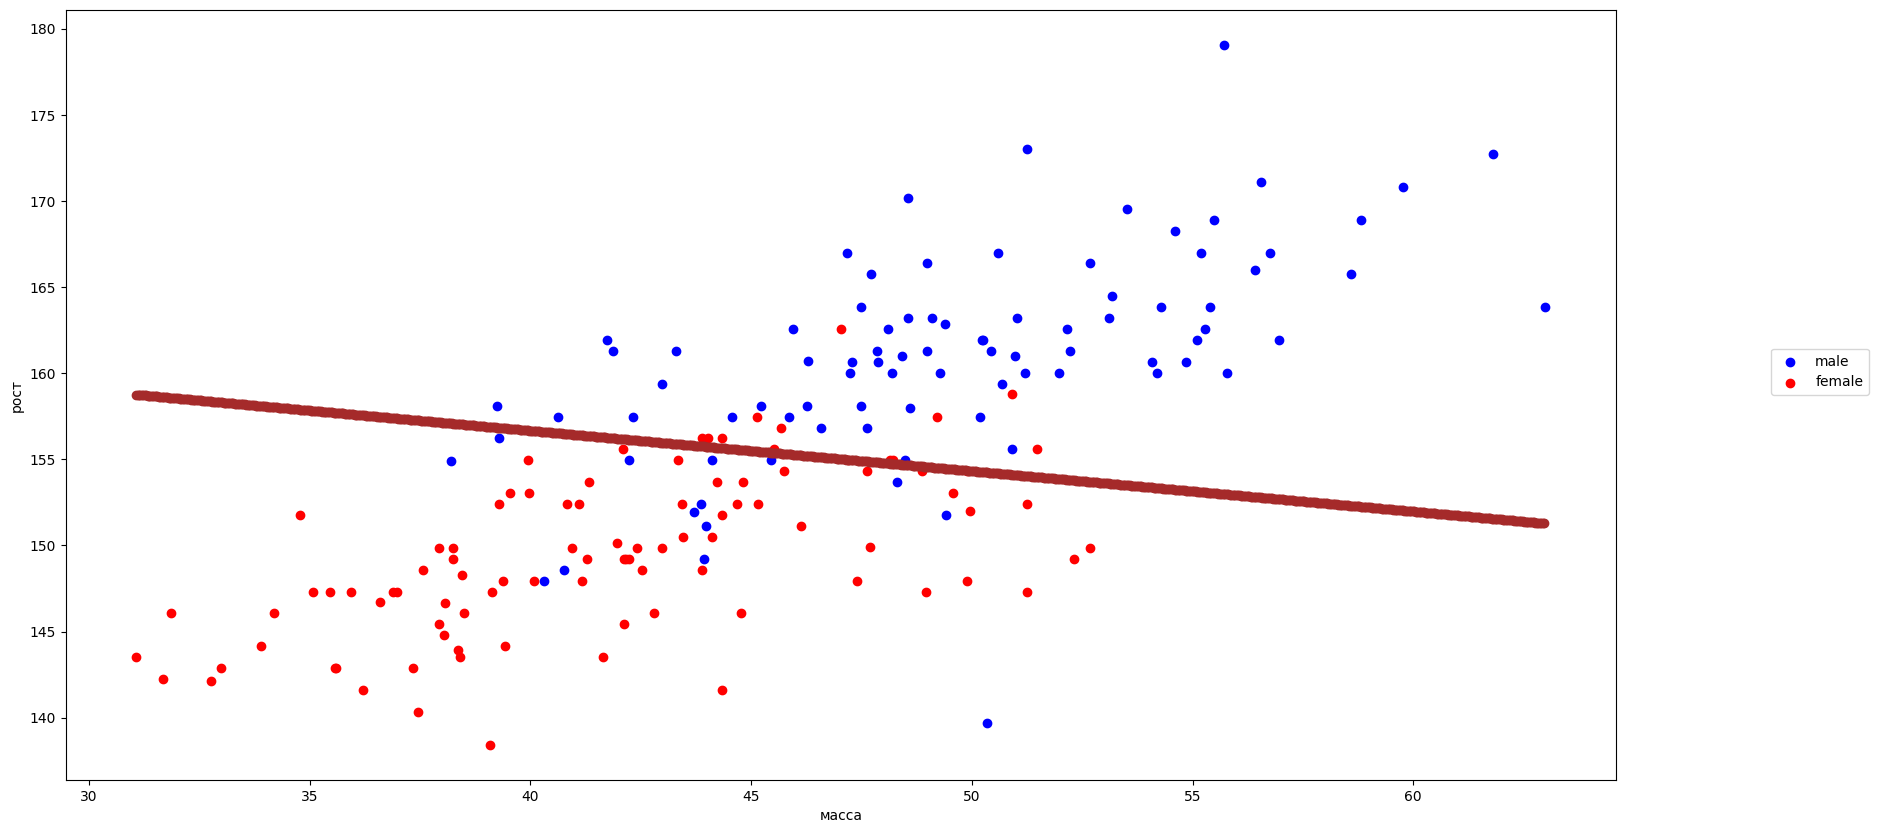

In [133]:
# Нормировка данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели
lr = LogisticRegression(random_state=2023, solver='lbfgs').fit(X_train_scaled, y_train)

# Построение графика
plot(df_sample.loc[X_train.index])  # Используем индексы из X_train

# Вычисление линии разделения
lims = np.arange(df_sample.weight.min(), df_sample.weight.max(), (df_sample.weight.max() - df_sample.weight.min())/1000)

# Нормируем lims
lims_scaled = scaler.transform(np.column_stack((np.zeros_like(lims), lims)))[:, 1]

# Вычисляем separation в нормированном масштабе
separation_scaled = (-lr.intercept_ - lr.coef_[0][1] * lims_scaled) / lr.coef_[0][0]

# Обратно преобразуем separation в исходный масштаб
separation = scaler.inverse_transform(np.column_stack((separation_scaled, lims_scaled)))[:, 0]

# Рисуем линию разделения
plt.scatter(lims, separation, color='brown')

# Отображение графика
plt.show()

Почему линия разделения сместилась?
Нормировка данных:


После применения StandardScaler данные преобразуются так, что их среднее значение становится 0, а стандартное отклонение — 1. Это изменяет масштаб данных, и коэффициенты модели логистической регрессии теперь работают с этими нормированными значениями.

Линия разделения строится на нормированных данных:
Ваша формула для линии разделения:


separation = (-lr.intercept_ - lr.coef_[0][1] * lims) / lr.coef_[0][0]
использует коэффициенты модели, обученной на нормированных данных (X_train_scaled). Однако вы строите график на исходных данных (df_sample), которые не нормированы. Это приводит к несоответствию масштабов.

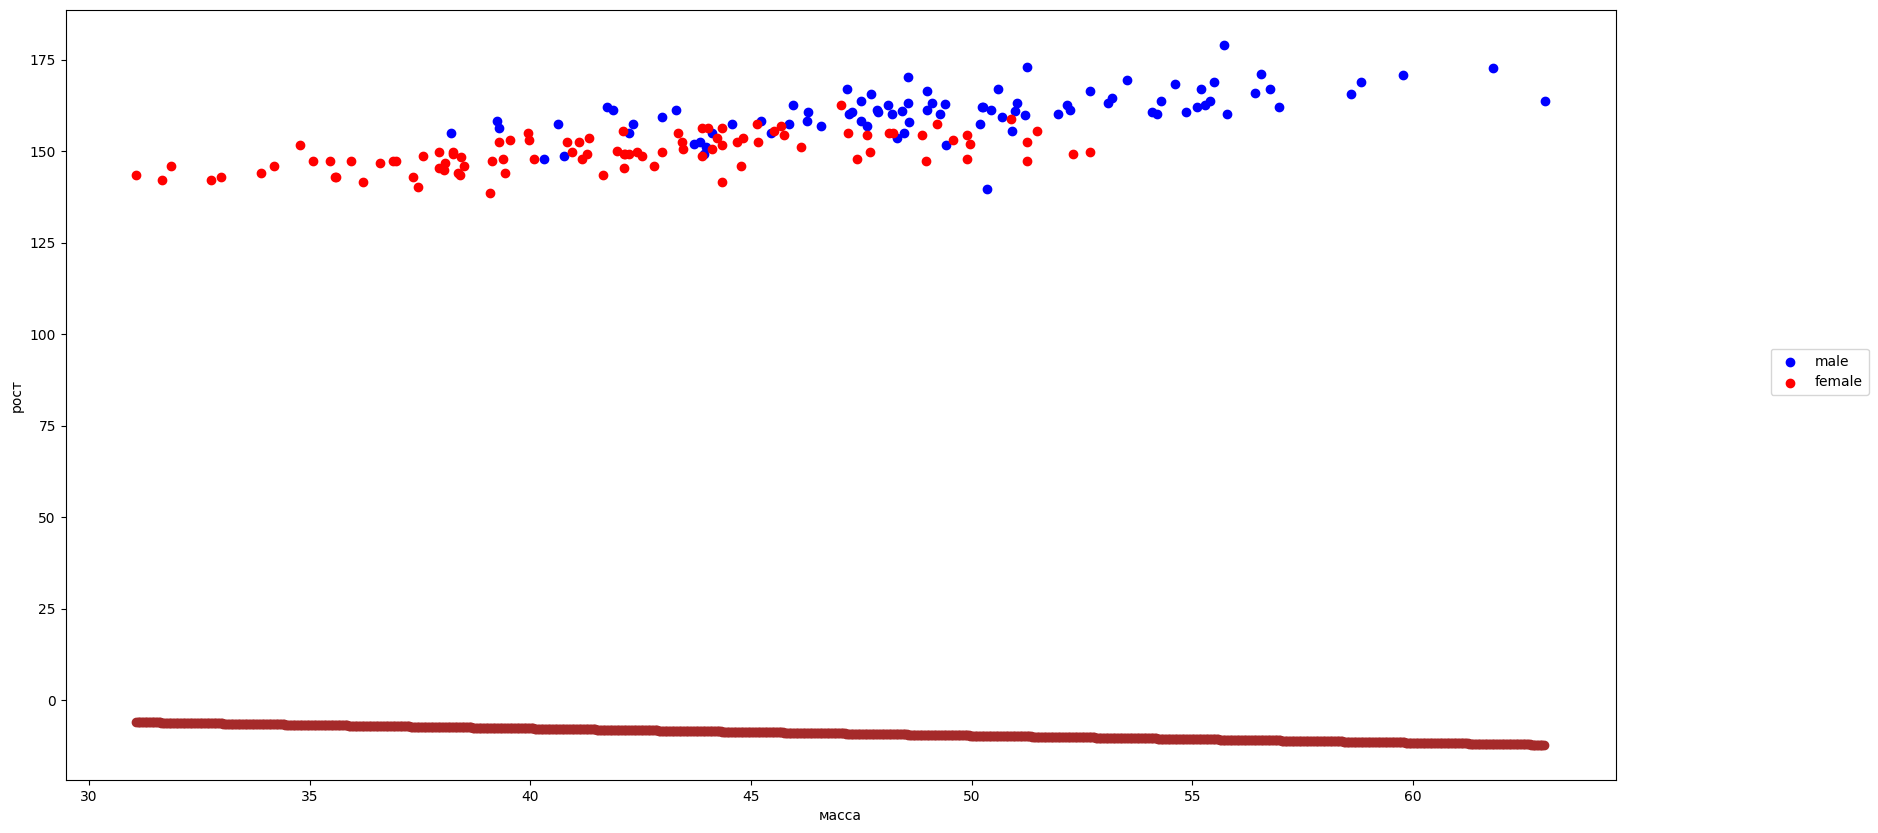

In [91]:
# Используем индексы из X_train
plot(df_sample.loc[X_train.index])

# Остальная часть кода
lims = np.arange(df_sample.weight.min(), df_sample.weight.max(), (df_sample.weight.max() - df_sample.weight.min())/1000)
separation = (-lr.intercept_ - lr.coef_[0][1] * lims) / lr.coef_[0][0]
plt.scatter(lims, separation, color='brown')
plt.show()

In [109]:
lr.predict(X_test_scaled)      # (X_test)

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1])

X_test_scaled_ — это массив NumPy, а не DataFrame, поэтому у него нет метода .iloc[]. Давайте разберем, как исправить код и избежать ошибки.

Поэтому для нормированных данных делать надо так:

lr.predict_proba(X_test.iloc[[0]])   # ВЕРОЯТНОСТИ ОЧЕНЬ ПЛОХИЕ, 50 % так не получится сделать так как у нас нормировали мы данные поэтому делаем так :

In [114]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# lr.predict_proba(X_test_scaled_.iloc[[0]])   # ВЕРОЯТНОСТИ ОЧЕНЬ ПЛОХИЕ, 50 %

# Предсказание вероятностей для первого элемента тестовой выборки
probabilities = lr.predict_proba(X_test_scaled[0].reshape(1, -1))
print(probabilities)

[[0.45852687 0.54147313]]


In [120]:
X_test.iloc[[0]]    # обращение к  DataFrame

,height,weight
165,154.94,49.696674


Просмотр данных в X_test_scaled
Если X_test_scaled — это массив NumPy (например, после применения StandardScaler), то у него нет метода .iloc[]. Вместо этого нужно использовать индексацию массивов NumPy.

Как посмотреть первую строку в X_test_scaled?

In [134]:
X_test_scaled[0]  # Первая строка массива

array([-0.01060726,  0.64075622])

In [135]:
# Просмотр первой строки в X_test_scaled (массив NumPy)
print("\nПервая строка в X_test_scaled:")
first_row_scaled = pd.DataFrame(X_test_scaled[0].reshape(1, -1), columns=['height', 'weight'])
print(first_row_scaled)


Первая строка в X_test_scaled:
     height    weight
0 -0.010607  0.640756


ИЛИ ТАК ПОСМОТРЕТЬ ПОЛНОСТЬЮ

In [123]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Нормировка данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Просмотр первой строки в X_test (DataFrame)
print("Первая строка в X_test:")
print(X_test.iloc[[0]])

# Просмотр первой строки в X_test_scaled (массив NumPy)
print("\nПервая строка в X_test_scaled:")
first_row_scaled = pd.DataFrame(X_test_scaled[0].reshape(1, -1), columns=['height', 'weight'])
print(first_row_scaled)

Первая строка в X_test:
     height     weight
165  154.94  49.696674

Первая строка в X_test_scaled:
     height    weight
0 -0.010607  0.640756


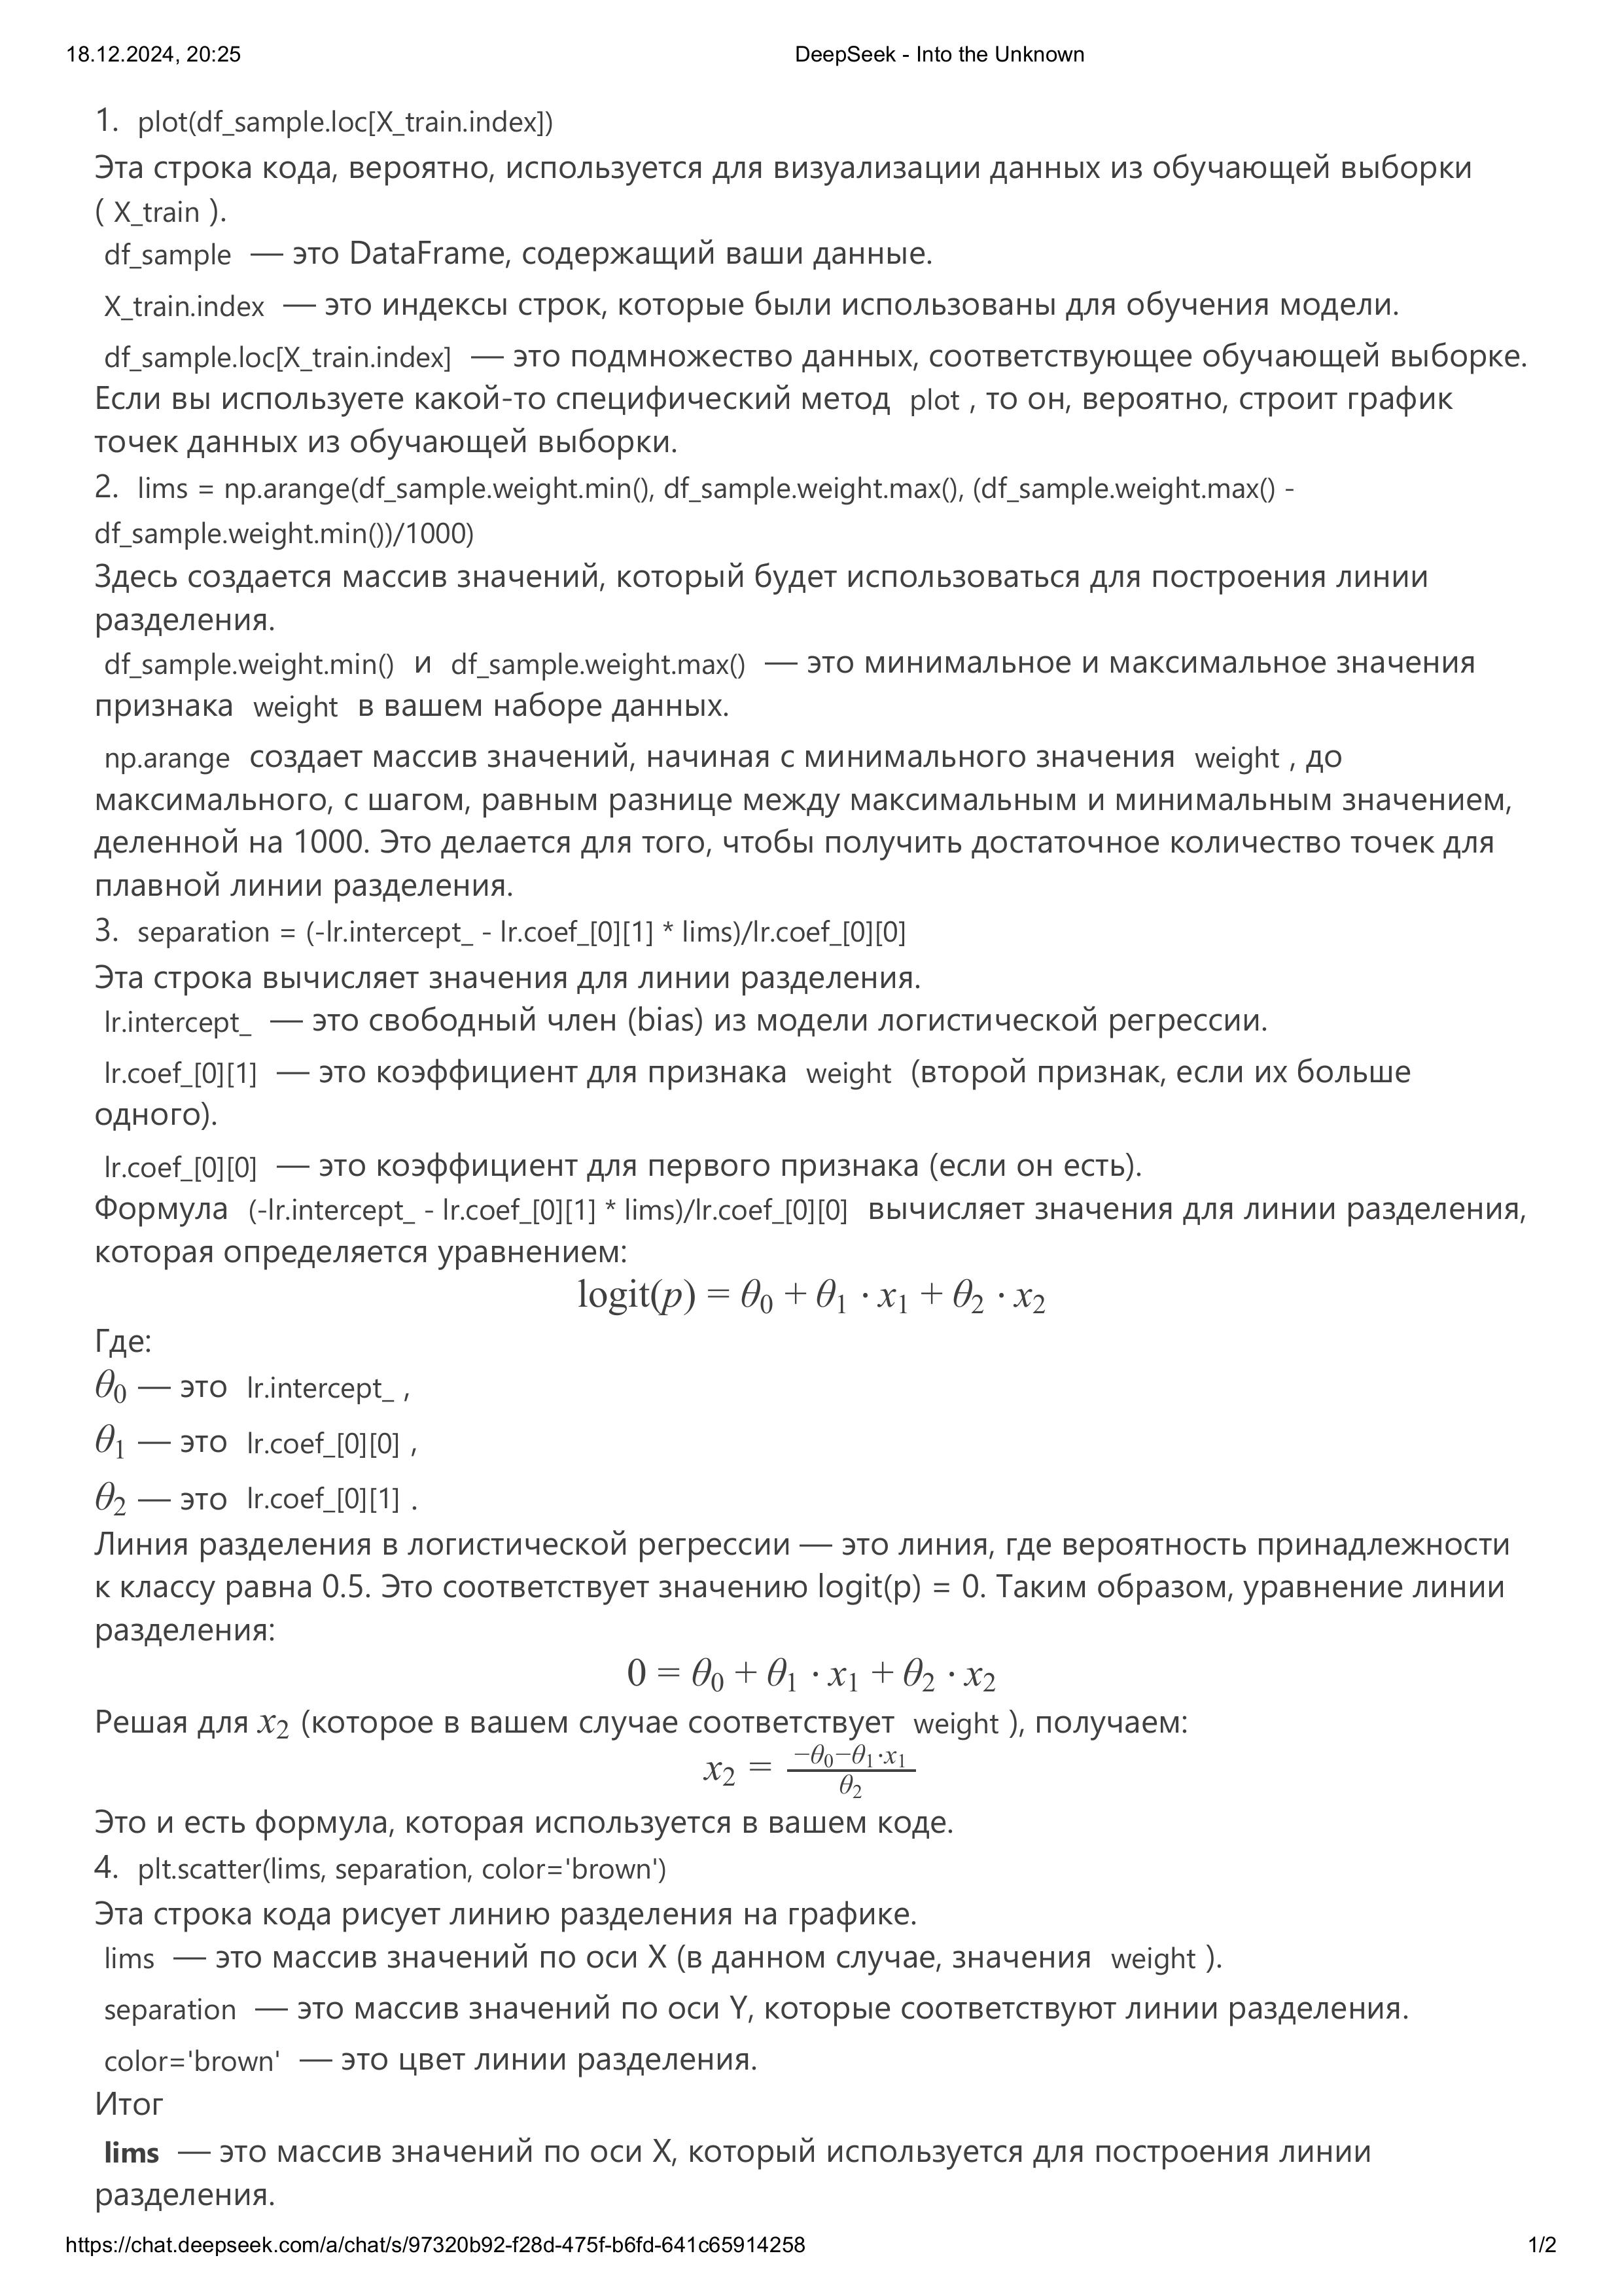

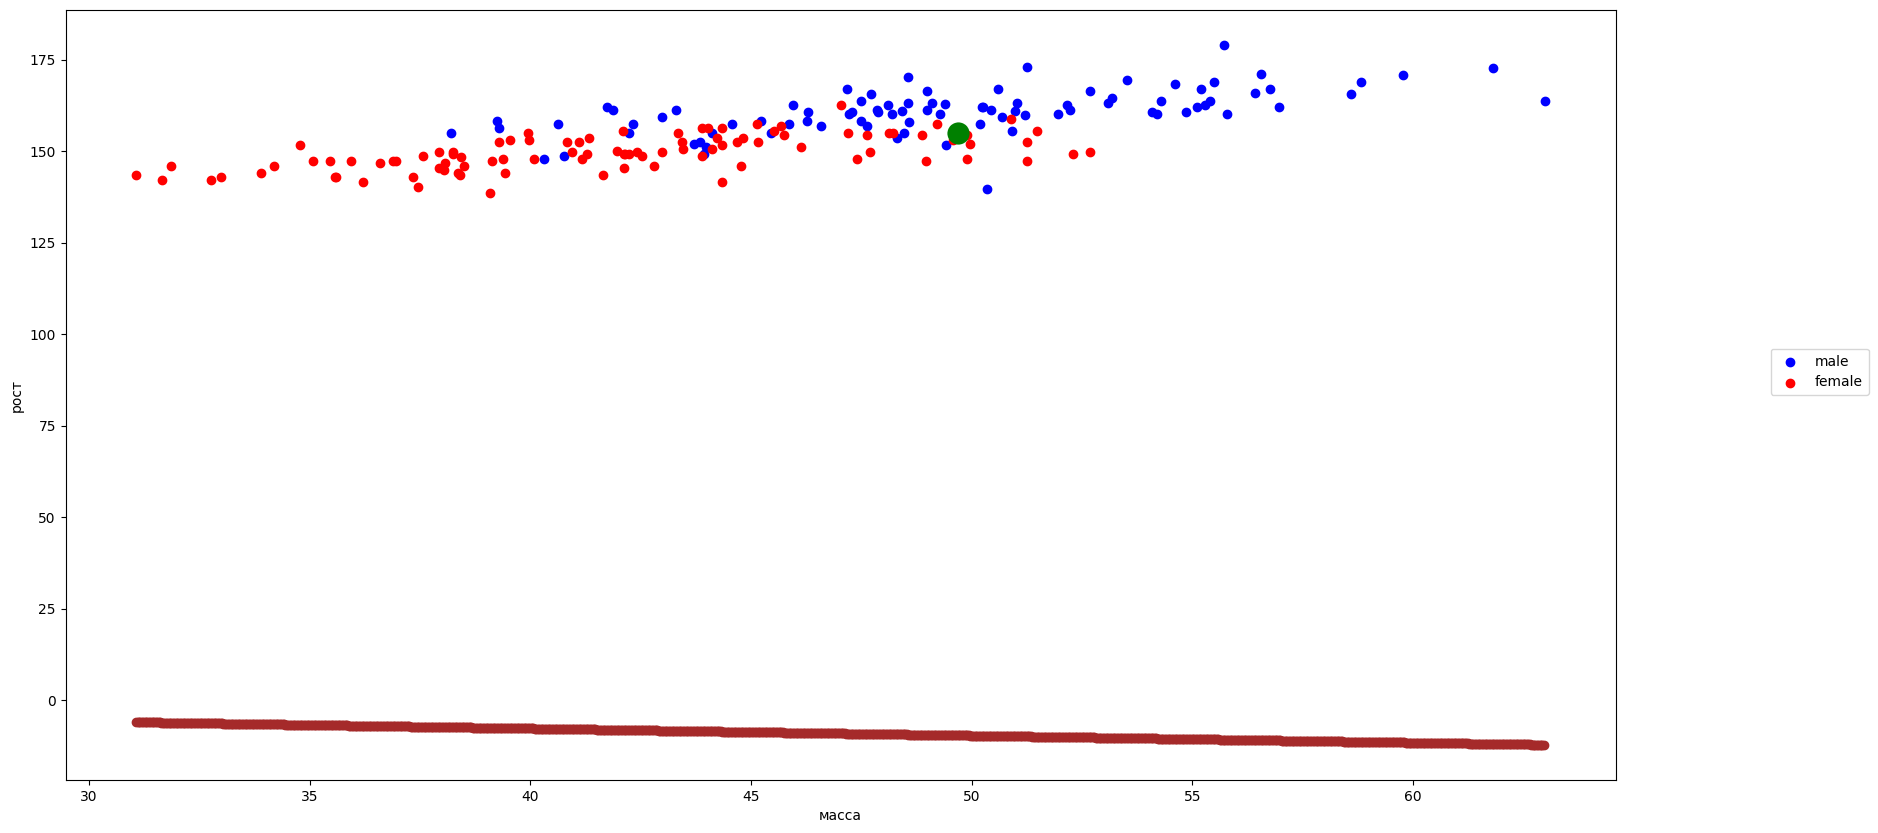

In [124]:
plot(df_sample.loc[X_train.index])
lims = np.arange(df_sample.weight.min(), df_sample.weight.max(), (df_sample.weight.max() - df_sample.weight.min())/1000)
separation = (-lr.intercept_ - lr.coef_[0][1] * lims)/lr.coef_[0][0]
plt.scatter(lims, separation, color='brown')
plt.scatter(X_test.iloc[[0]].weight, X_test.iloc[[0]].height, color='green', linewidth=10)

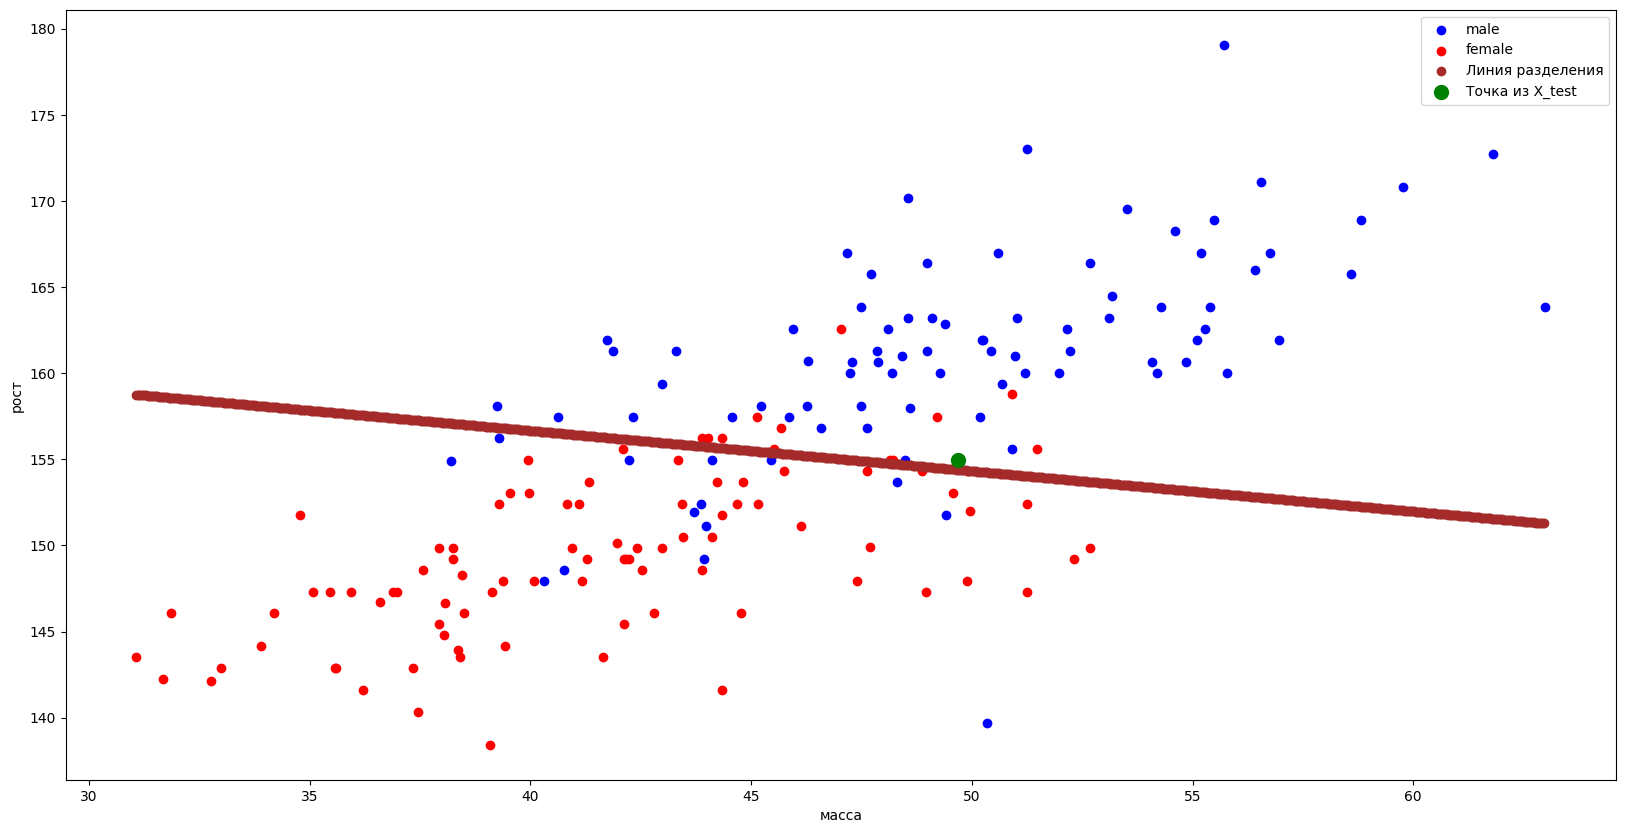

In [125]:
# Построение графика с обучающими данными
plot(df_sample.loc[X_train.index])

# Построение линии разделения
lims = np.arange(df_sample.weight.min(), df_sample.weight.max(), (df_sample.weight.max() - df_sample.weight.min())/1000)

# Нормируем lims (вес)
lims_scaled = (lims - scaler.mean_[1]) / scaler.scale_[1]

# Вычисляем separation в нормированном масштабе
separation_scaled = (-lr.intercept_ - lr.coef_[0][1] * lims_scaled) / lr.coef_[0][0]

# Обратно преобразуем separation в исходный масштаб (рост)
separation = separation_scaled * scaler.scale_[0] + scaler.mean_[0]

# Рисуем линию разделения
plt.scatter(lims, separation, color='brown', label='Линия разделения')

# Добавляем точку из X_test (первая строка)
plt.scatter(X_test.iloc[0]['weight'], X_test.iloc[0]['height'], color='green', s=100, label='Точка из X_test')

# Добавляем легенду
plt.legend()

# Отображение графика
plt.show()

## Немного о метриках качества

Пусть $a: \Omega \to \{1, 2, ..., K\}$ — алгоритм классификации, $X \subset \Omega$, $X = \{(x, y(x))\}$.

$$
\mathsf{accuracy}(a, X) = \frac{1}{\mathsf{card} (X)} \sum\limits_{x \in X} \mathsf I(a(x) = y(x))
$$
— доля верных ответов (точность).

In [77]:
accuracy_score(y_test, lr.predict(X_test_scaled)) #  X_test

0.8227848101265823

Матрица ошибок:

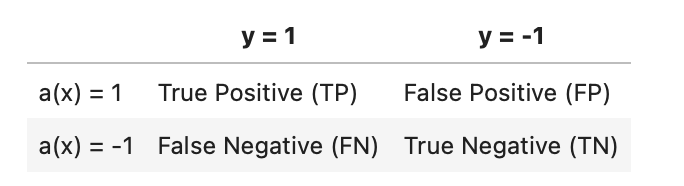

In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr.predict(X_test_scaled))    # X_test

array([[33, 10],
       [ 4, 32]])

Точность (precision). Точность показывает долю верно предсказанных положительных объектов среди всех предсказаний положительного класса:
$$
\mathsf{precision}(a, X) = \frac{TP}{TP + FP}
$$

In [127]:
from sklearn.metrics import precision_score
precision_score(y_test, lr.predict(X_test_scaled))    # X_test

0.7619047619047619

Полнота (recall). Полнота показывает долю верно предсказанных положительных объектов среди всех положительных объектов в данных:
$$
\mathsf{recall}(a, X) = \frac{TP}{TP + FN}
$$

In [128]:
from sklearn.metrics import recall_score
recall_score(y_test, lr.predict(X_test_scaled))    # X_test

0.8888888888888888

$F_\beta$ — сбалансированная точность и полнота:
$$
F_\beta(a, X) = (1 + \beta^2) \frac{\mathsf{precision}(a, X) \cdot \mathsf{recall}(a, X)}{\beta^2\mathsf{precision}(a, X) + \mathsf{recall}(a, X)}.
$$
$F_1$ — среднее гармоническое:
$$
F_1 (a, X) = 2 \frac{\mathsf{precision}(a, X) \cdot \mathsf{recall}(a, X)}{\mathsf{precision}(a, X) + \mathsf{recall}(a, X)}.
$$

In [129]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, lr.predict(X_test_scaled), beta=1)      # X_test

0.8205128205128205

До сих пор мы обсуждали ситуацию нулей и единиц. Но можно же говорить о вероятностях. Если $a(x): \Omega \to [0, 1]$ — алгоритм, возвращающий вероятность, то можно настраивать порог отсечения `threshold`:
$$
\widehat y(x) = \begin{cases}
1, & a(x) > \mathsf{threshold} \\
0, & \mathsf{otherwise}
\end{cases}.
$$
При разных порогах отсечения будут разными, вообще говоря, как точность, так и полнота.
$$
FPR = \frac{FP}{FP + TN}, \quad TPR = \frac{TP}{TP + FN}
$$

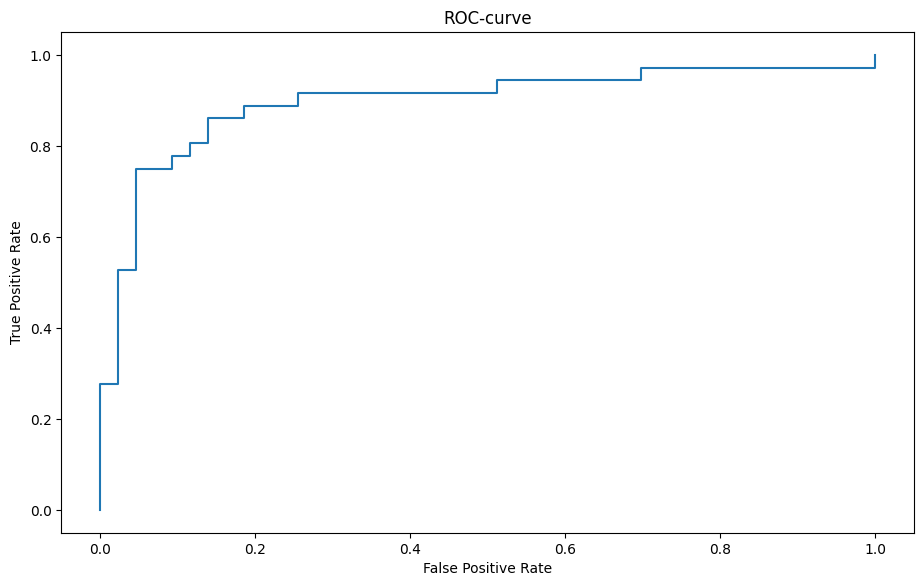

In [130]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1])        # X_test
plt.figure(figsize = (11, 6.5))
plt.plot(fpr, tpr)
plt.title('ROC-curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Площадь под ROC-кривой показывает вероятность того, что случайно выбранная пара объектов, где один из них относится к положительному классу, а другой — к отрицательному, окажется отранжированной правильно с точки зрения вероятностей (алгоритм выдаст бОльшую вероятность в случае объекта положительного класса).

In [131]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1])     # X_test

0.8966408268733851

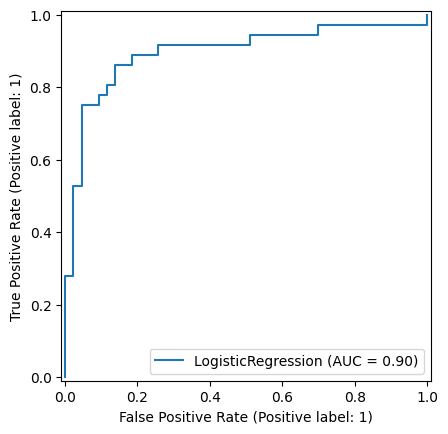

In [132]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test)      # X_test